In [1]:
import numpy as np
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage import io, color, transform

import cv2
import numpy as np
import os
import pandas as pd
import re

from PIL import Image
from sklearn.preprocessing import MinMaxScaler

# READ DATA

In [2]:
#data_train = pd.read_csv("/Users/lethanhtien/Desktop/run/data/train.csv")
data = pd.read_csv("dataset.csv")

# CHECK CLASS IMBALANCE

In [3]:
class_counts = data['label'].value_counts()
print(class_counts)

label
1    1250
4    1250
3    1250
2    1250
0    1240
Name: count, dtype: int64


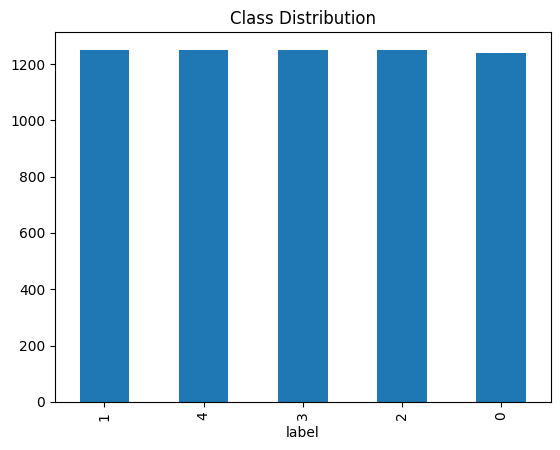

In [4]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ cân bằng lớp
class_counts.plot(kind='bar', title='Class Distribution')
plt.show()


In [5]:
total_samples = len(data)
class_ratios = class_counts / total_samples
print(class_ratios)


label
1    0.200321
4    0.200321
3    0.200321
2    0.200321
0    0.198718
Name: count, dtype: float64


# SPLIT DATA

In [6]:
# x_train = data_train.drop("label", axis=1)
# y_train = data_train['label']

# x_test = data_test.drop("label", axis=1)
# y_test = data_test['label']

x = data.drop("label", axis=1)
y = data['label']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = X_train.values, X_test.values, y_train.values, y_test.values

In [8]:
X_train[0]

array([ 12,  11,  11, ..., 221, 223, 218], dtype=int64)

# SCALE DATA

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
# Khởi tạo mô hình MinMaxScaler và fit trên tập huấn luyện
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Sử dụng mô hình đã fit để chuẩn hóa tập kiểm tra
X_test_scaled = scaler.transform(X_test)

# TRAINING

In [11]:
from sklearn.svm import SVC
# Huấn luyện mô hình SVM với các tham số cụ thể
svm_model = SVC(C=0.1, gamma=0.1, kernel='linear', probability=True)
svm_model.fit(X_train_scaled, y_train)

# Dự đoán nhãn trên tập kiểm tra
y_pred = svm_model.predict(X_test_scaled)

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# EVALUATE

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Tính precision, recall, và f1-score cho từng lớp
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

class_names = [0,1,2,3,4]

# Đánh giá độ chính xác của mô hình
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}\n')

for i in range(len(class_names)):
    print(f"Class {class_names[i]}:")
    print(f"  Precision: {precision[i]:.4f}")
    print(f"  Recall: {recall[i]:.4f}")
    print(f"  F1-Score: {f1[i]:.4f}")
    print()


Accuracy: 0.609

Class 0:
  Precision: 0.4793
  Recall: 0.5474
  F1-Score: 0.5111

Class 1:
  Precision: 0.4783
  Recall: 0.4074
  F1-Score: 0.4400

Class 2:
  Precision: 0.4320
  Recall: 0.4635
  F1-Score: 0.4472

Class 3:
  Precision: 0.8090
  Recall: 0.8385
  F1-Score: 0.8235

Class 4:
  Precision: 0.8608
  Recall: 0.7952
  F1-Score: 0.8267



# TEST

In [ ]:
def test(path):
    # Đường dẫn của tấm ảnh
    image_path = path

    # Mở ảnh bằng Pillow
    img = Image.open(image_path)

    # Chuyển ảnh về ảnh trắng đen
    img = img.convert("L")

    # Chuyển ảnh thành mảng NumPy
    img_array = np.array(img)

    # Resize ảnh về kích thước mong muốn
    resized_img = cv2.resize(img_array, (48, 48))

    flattened_img = resized_img.flatten().reshape(-1, 1)
    # Use MinMaxScaler
    scaler = MinMaxScaler()
    img1 = scaler.fit_transform(flattened_img).T

    y_pred = svm_model.predict(img1)

    return y_pred

In [ ]:
test("/Users/lethanhtien/Desktop/UIT/MACHINE LEARNING/CS114.O11-FinalProject/data_img/fear/(fear) 298.jpg")

array([1])

# SAVE MODEL

In [ ]:
from joblib import dump
dump(svm_model, 'svm_model.joblib')

['svm_model.joblib']

# TRAINING

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Thiết lập các giá trị thử nghiệm cho C, kernel và gamma
param_grid = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf'],
              'gamma': [0.1, 1, 10]}

# Tạo mô hình SVM
svm_model = SVC()

# Sử dụng GridSearchCV để tìm kiếm qua lưới tham số
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# In ra tham số tốt nhất
print("Best Parameters:", grid_search.best_params_)

# Đánh giá mô hình trên tập kiểm tra
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Best Parameters: {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
Accuracy: 0.579


# GRADIO.APP INTERFACE


In [ ]:
%pip install --upgrade gradio


[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: C:\Users\Admin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



                                              0.0/16.6 MB ? eta -:--:--
                                              0.0/16.6 MB ? eta -:--:--
                                             0.0/16.6 MB 330.3 kB/s eta 0:00:51
                                             0.0/16.6 MB 330.3 kB/s eta 0:00:51
                                             0.1/16.6 MB 365.7 kB/s eta 0:00:46
                                             0.1/16.6 MB 602.4 kB/s eta 0:00:28
                                              0.3/16.6 MB 1.4 MB/s eta 0:00:12
     -                                        0.4/16.6 MB 1.7 MB/s eta 0:00:10
     --                                       0.9/16.6 MB 2.9 MB/s eta 0:00:06
     ---                                      1.3/16.6 MB 3.9 MB/s eta 0:00:04
     ----                                     1.8/16.6 MB 5.1 MB/s eta 0:00:03
     -----                                    2.3/16.6 MB 5.7 MB/s eta 0:00:03
     ------                                   2.8/16.6 MB 6.6

In [ ]:
import gradio as gr
import numpy as np
from PIL import Image
from joblib import load

svm_model = load('svm_model.joblib')

emotion_labels = {
    0: "Angry",
    1: "Fear",
    2: "Sad",
    3: "Neutral",
    4: "Happy",
}

def predict_emotion(image):
    processed_image = Image.fromarray(image).convert('L').resize((48, 48))
    processed_image = np.array(
        processed_image).flatten().reshape(1, -1) / 255.0

    prediction = svm_model.predict(processed_image)[0]
    return emotion_labels[prediction]


iface = gr.Interface(
    fn=predict_emotion,
    inputs="image",
    outputs="text",
    title="Emotion Detection",
    description="Upload an image and predict the emotion."
)

iface.launch()

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\gradio\queueing.py", line 489, in call_prediction
    output = await route_utils.call_process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\gradio\route_utils.py", line 232, in call_process_api
    output = await app.get_blocks().process_api(
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\gradio\blocks.py", line 1561, in process_api
    result = await self.call_function(
             ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\Loca